## Cluster Analysis

**Submitted By** 

**Abhilasha Chourasia D19001,**
**Vasundhara Singh    D19034**

### What is Clustering?


**Clustering algorithm are unsupervised learning algorithms.It is only used for numerical data. It is a divide and conquer strategy which divides the dataset into homogenous groups which can be further used to prescribe the right strategy for different groups.In clustering, the objective is to ensure that the variation within a cluster is minimized while the variation between the clusters is maximized.**

### Types of Clustering

##### Hierarchical Clustering 
**Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.It is further divided into two types.**


**Agglomerative clustering: It works in a bottom-up manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below). The result is a tree which can be plotted as a dendrogram.**


**Divisive hierarchical clustering: It works in a top-down manner. The algorithm is an inverse order of Agglomerative. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. The process is iterated until all objects are in their own cluster (see figure below).**


##### K-Means Clustering

**K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:**

**The centroids of the K clusters, which can be used to label new data**

**Labels for the training data (each data point is assigned to a single cluster)**

**Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.** 

**Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.**

### Difference Between Cluster Analysis and Classification

**Classification and Clustering are the two types of learning methods which characterize objects into groups by one or more features. These processes appear to be similar, but there is a difference between them in context of data mining. The prior difference between classification and clustering is that classification is used in supervised learning technique where predefined labels are assigned to instances by properties, on the contrary, clustering is used in unsupervised learning where similar instances are grouped, based on their features or properties.**

### Dataset:Credit Card Dataset from Kaggle.com

In [1]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#change directory 
os.chdir("C:\\Users\\abhi3\\Desktop\\ML")

In [3]:
#read the dataset
cc = pd.read_csv("CC GENERAL.csv")

In [4]:
#description of dataset
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#finding missing values in the dataset
missing = cc.isna().sum()
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
#missing value imputation using median
cc = cc.fillna(cc.median() )

In [7]:
#cross-check for missing values
missing = cc.isna().sum()
print(missing)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [8]:
cc.sample(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1743,C11802,11.249863,0.636364,137.84,137.84,0.00,0.000000,0.166667,0.166667,0.0,0.000000,0,3,10000.0,234.444295,101.418698,0.166667,12
3043,C13132,1394.445085,1.000000,0.00,0.00,0.00,279.693602,0.000000,0.000000,0.0,0.333333,4,0,1600.0,389.817084,510.935129,0.000000,12
8332,C18553,150.897044,0.181818,0.00,0.00,0.00,900.772781,0.000000,0.000000,0.0,0.083333,1,0,2500.0,0.000000,312.343947,0.000000,12
1201,C11245,49.022296,1.000000,480.27,0.00,480.27,0.000000,1.000000,0.000000,1.0,0.000000,0,37,2500.0,636.766732,179.232469,1.000000,12


In [9]:
#feature scaling
cctemp = cc
cctemp.iloc[:,1:] = cctemp.iloc[:,1:].apply(lambda x: (x - np.mean(x)) / np.std(x))


In [10]:
cctemp.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8122,C18342,0.141003,0.518084,-0.469552,-0.356934,-0.454576,0.012599,-1.221758,-0.678661,-0.916995,0.990398,1.428897,-0.591796,-0.548114,-0.499044,-0.013068,-0.525551,0.360680
1345,C11390,1.942927,0.518084,-0.469552,-0.356934,-0.454576,1.613725,-1.221758,-0.678661,-0.916995,0.157527,0.256610,-0.591796,1.788050,-0.029276,0.161810,-0.525551,0.360680
4940,C15079,-0.607591,0.518084,-0.244887,-0.278611,-0.067531,-0.268141,1.269843,-0.199788,1.239743,1.466326,-0.036462,-0.269945,-0.960378,-0.559319,-0.319081,-0.525551,-3.375526
8325,C18546,-0.629483,0.518084,0.553010,-0.356934,1.961381,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,1.057688,-0.135850,0.053941,-0.281444,1.183951,0.360680
6699,C16887,-0.701211,0.518084,-0.452824,-0.356934,-0.415053,-0.466786,-0.806490,-0.678661,-0.497629,-0.675349,-0.476070,-0.511333,-0.822957,-0.573959,-0.285768,-0.525551,0.360680


In [11]:
#Import Library for Hierarchical Clustring
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
#Linkage in Hierarchical Clustring
#Single Linkage-Minimal inter-cluster dissimilarity
#Complete Linkage-Maximal inter-cluster dissimilarity
#Average Linkage-Mean inter-cluster dissimilarity
Z = linkage(cctemp.iloc[:,1:], 'complete')

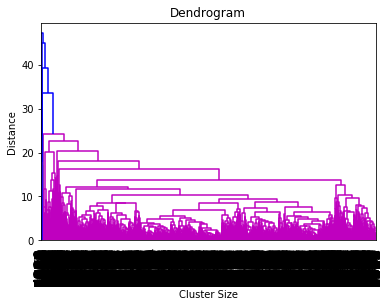

In [13]:
#Plotting dendrogram 
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

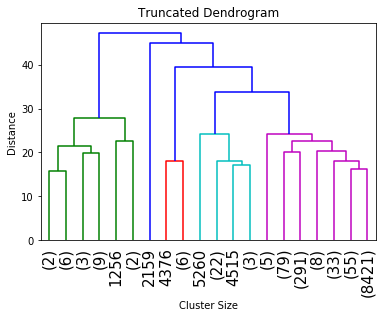

In [14]:
#Plotting Truncated Dendrogram
dendrogram(Z,truncate_mode='lastp',p=20,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [15]:
#Import Library for Agglomerative Clustering
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [16]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [17]:
hclust.fit(cctemp.iloc[:,1:])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

In [18]:
cctemp['Groups'] = hclust.labels_

In [19]:
cctemp.groupby(['Groups']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Groups,,,,,,,,,,,,,,,,,
0,1.560432,0.332878,12.404373,13.149222,5.171828,0.304674,1.033322,2.158489,0.866221,-0.367548,-0.093802,4.402135,3.162264,9.121497,0.752010,1.298256,0.295702
1,-0.013123,-0.002598,-0.047103,-0.037646,-0.042189,-0.003564,-0.006130,-0.008661,-0.006790,0.001314,-0.001756,-0.029182,-0.015965,-0.034452,-0.023695,-0.002934,-0.002185
2,4.487609,0.518084,-0.267386,-0.276502,-0.124560,22.011117,0.231675,0.159367,0.341102,4.321897,17.547848,0.253062,4.151698,12.890058,1.950247,-0.525551,0.360680
3,2.454871,0.518084,0.332922,-0.356934,1.441390,0.014151,0.202014,-0.678661,0.520830,-0.377893,-0.141131,0.781816,0.539478,0.150786,22.195897,-0.525551,0.360680
4,2.189839,0.418591,4.869649,1.299686,9.119408,0.095352,1.077590,1.183624,1.350686,-0.181794,0.044947,5.648528,2.270551,3.059578,1.336344,0.016052,0.360680


In [20]:
#Import Library for K-means clustering
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=5,n_init=40)

In [22]:
km.fit(cctemp.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
km.labels_

array([1, 2, 3, ..., 0, 1, 1])

In [24]:
km.inertia_

91758.0369900035

In [25]:
#no.of clusters made is 2 to 30 and calculating the inertia.
#Inertia is the sum of squared error for each cluster. 
#Therefore the smaller the inertia the denser the cluster(closer together all the points are)
inertias = []
for k in range(2,30):
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(cctemp.iloc[:,1:]).inertia_
    inertias.append(inertia)
print(inertias)

[128078.12222899185, 112265.48469006167, 99347.46995597119, 91756.86167332085, 85091.16934902691, 79767.33414665406, 74723.0150827445, 70214.29301326399, 66692.20763348018, 63870.66814523414, 61545.02065684437, 59317.88144942875, 57642.54966786532, 56004.323287252, 54391.384839078906, 53120.57641985905, 51827.61956028325, 50603.97873755435, 49507.41839841487, 48549.38661825787, 47755.66672894708, 46660.03666819713, 45933.59313363932, 45158.13930085084, 44271.90530047492, 43660.03077621236, 43050.176549601296, 42308.20072330211]


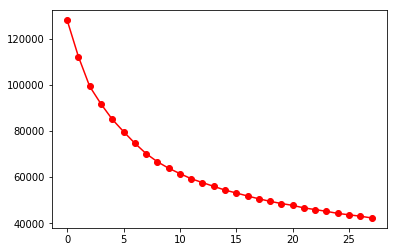

In [26]:
#plotting graph againt inertias
plt.plot(inertias, 'ro-', label="inertias")
plt.show()

### Observation:

##### As we can see there is no much variation in the inertia values after k=7(number of cluster). So we can choose any number of cluster 7 onwards.

### Conclusion:

##### We must also look at the computation cost while deciding number of clusters. As the number of cluster increases the computational cost increases. 